## Tarea 5 Aprendizaje no supervisado

In [ ]:
#dejamos solo las variables a utlizar

X_train_est = X_train_est[selected_features_grouped]

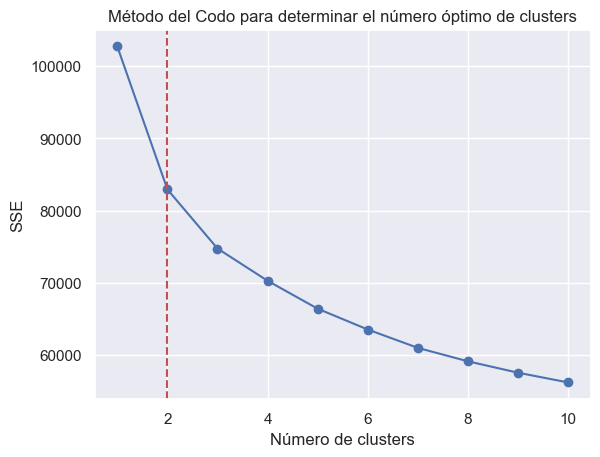

In [ ]:
#Metodo del codo para determinar el numero de clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_est)
    sse.append(kmeans.inertia_)

# Crear la figura y el eje
fig, ax = plt.subplots()

# Graficar SSE contra valores de k
ax.plot(k_values, sse, 'o-')

# Añadir línea punteada en x=2
ax.axvline(x=2, color='r', linestyle='--', ymax=1)

# Añadir etiquetas y título
ax.set_xlabel("Número de clusters")
ax.set_ylabel("SSE")
ax.set_title("Método del Codo para determinar el número óptimo de clusters")

# Mostrar el gráfico
plt.show()


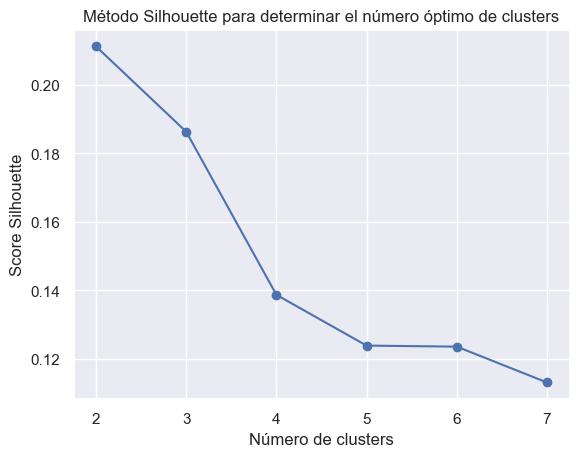

In [ ]:
#Metodo Silhouette para determinar el numero de clusters    
from sklearn.metrics import silhouette_score

sample_data = X_train_est.sample(frac=0.25, random_state=42)


sil = []
k_values = range(2, 8)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sample_data)
    silhouette_avg = silhouette_score(sample_data, kmeans.labels_)
    sil.append(silhouette_avg)

plt.plot(k_values, sil, 'o-')
plt.xlabel("Número de clusters")
plt.ylabel("Score Silhouette")
plt.title("Método Silhouette para determinar el número óptimo de clusters")
plt.show()


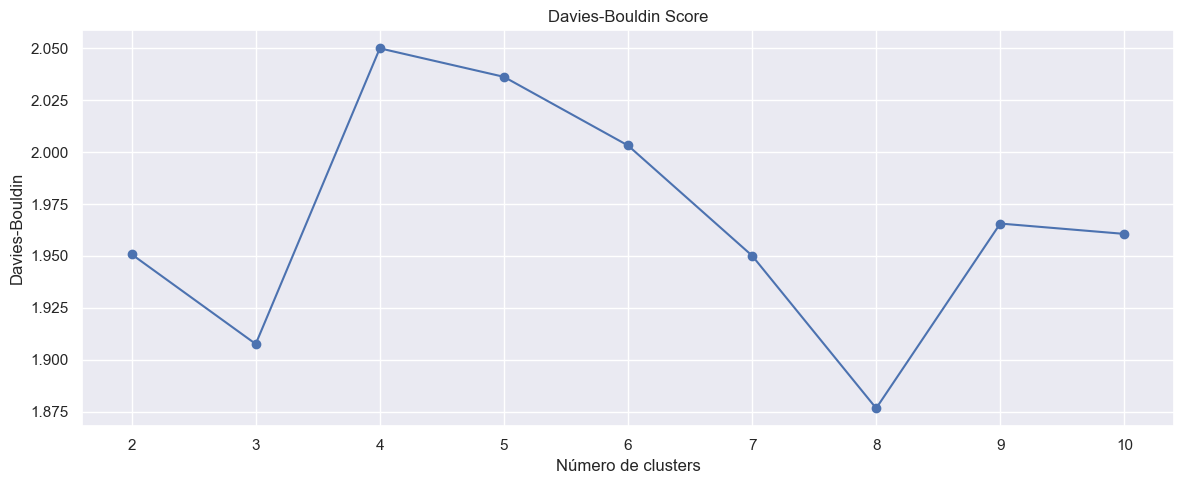

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Definir el rango de número de clusters que deseas evaluar
range_clusters = range(2, 11)  # Por ejemplo, de 2 a 10 clusters

# Listas para guardar los valores de las métricas
db_scores = []


for n_clusters in range_clusters:
    # Entrenar el modelo KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train_est)
    labels = kmeans.labels_
    
    # Calcular las métricas y añadir a las listas
    db_scores.append(davies_bouldin_score(X_train_est, labels))


# Graficar las métricas
plt.figure(figsize=(12, 5))


plt.plot(range_clusters, db_scores, 'o-')
plt.title('Davies-Bouldin Score')
plt.xlabel('Número de clusters')
plt.ylabel('Davies-Bouldin')



plt.tight_layout()
plt.show()


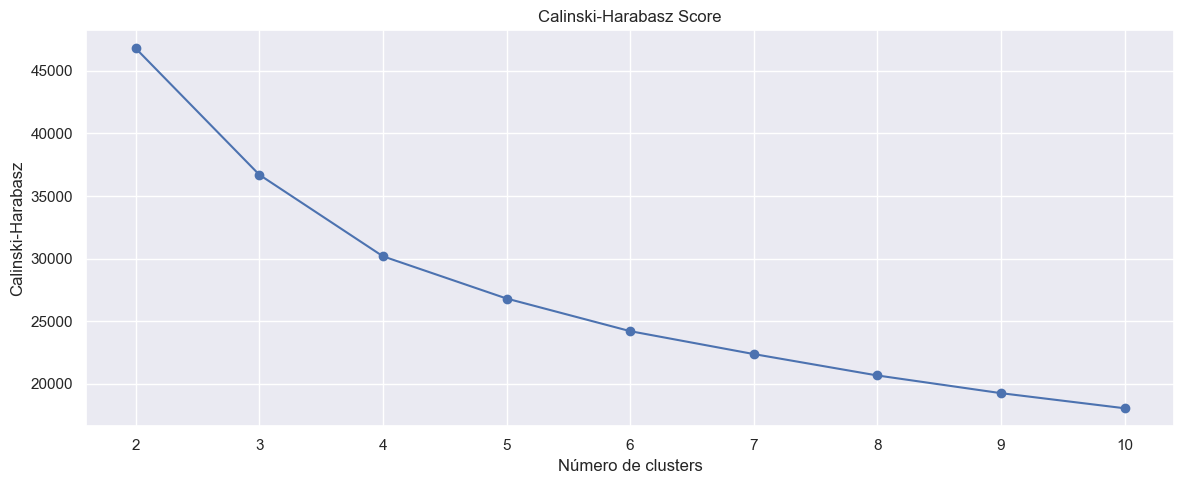

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Definir el rango de número de clusters que deseas evaluar
range_clusters = range(2, 11)  # Por ejemplo, de 2 a 10 clusters


ch_scores = []

for n_clusters in range_clusters:
    # Entrenar el modelo KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train_est)
    labels = kmeans.labels_
    

    ch_scores.append(calinski_harabasz_score(X_train_est, labels))

# Graficar las métricas
plt.figure(figsize=(12, 5))


plt.plot(range_clusters, ch_scores, 'o-')
plt.title('Calinski-Harabasz Score')
plt.xlabel('Número de clusters')
plt.ylabel('Calinski-Harabasz')

plt.tight_layout()
plt.show()


In [ ]:
#Entrenamos el modelo con 2 clusters
k_optimo = 2 #
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
kmeans.fit(X_train_est)
labels = kmeans.labels_


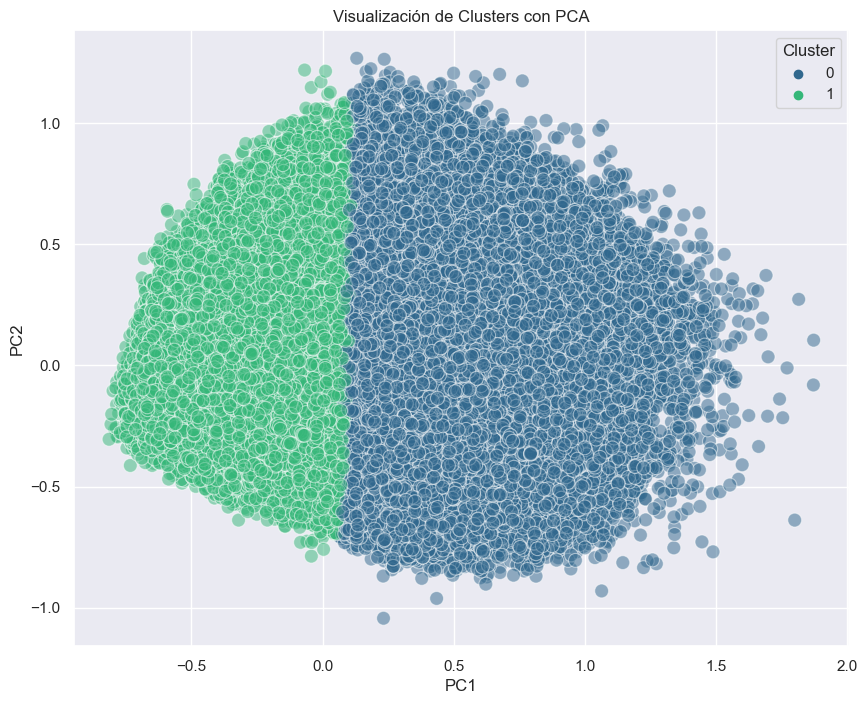

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Aplicar PCA y tomar los dos primeros componentes
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train_est)

# Crear un DataFrame con los componentes principales y las etiquetas de cluster
df_pca = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
df_pca['Cluster'] = labels

# Visualizar los 2 clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=df_pca, palette="viridis", s=100, alpha=0.5)
plt.title("Visualización de Clusters con PCA")
plt.show()


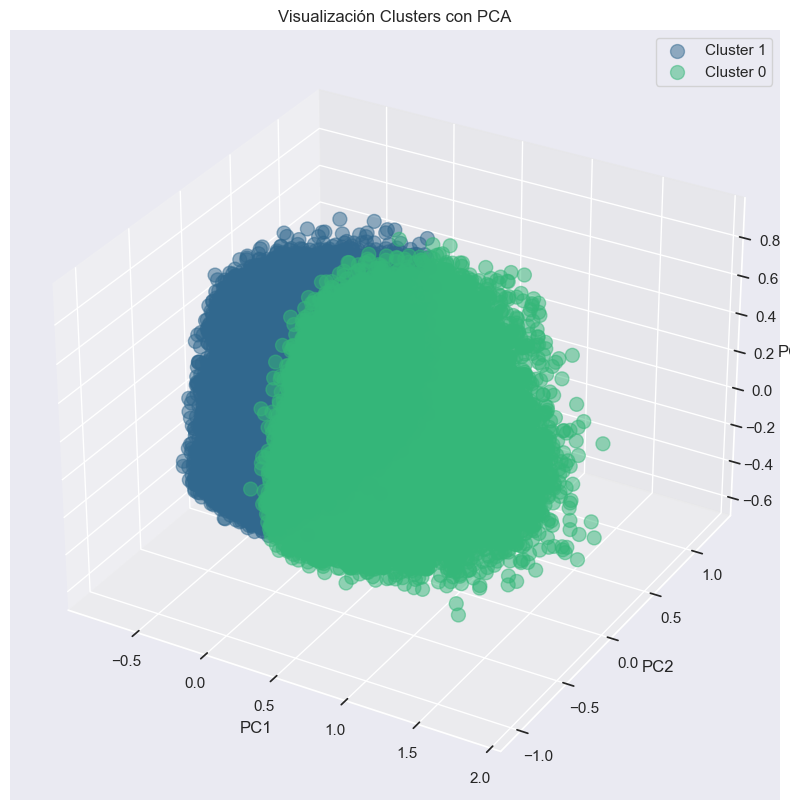

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import seaborn as sns

# Aplicar PCA y tomar los tres primeros componentes
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_train_est)

# Crear un DataFrame con los componentes principales y las etiquetas de cluster
df_pca = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3'])
df_pca['Cluster'] = labels

# Obtener la paleta de colores "viridis"
n_clusters = df_pca['Cluster'].nunique()
palette = sns.color_palette("viridis", n_clusters)

# Visualizar los clusters en 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for idx, cluster in enumerate(df_pca['Cluster'].unique()):
    subset = df_pca[df_pca['Cluster'] == cluster]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'], s = 100, alpha = 0.5, label=f"Cluster {cluster}", color=palette[idx])

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title("Visualización Clusters con PCA")
ax.legend()
plt.show()


In [ ]:
explained_variance = pca.explained_variance_ratio_
total_explained_variance = sum(explained_variance[:3]) * 100
print(f"Los tres primeros componentes principales explican aproximadamente {total_explained_variance:.2f}% de la varianza total.")


Los tres primeros componentes principales explican aproximadamente 55.51% de la varianza total.


In [ ]:
#Visualizamos los rerutlados variables de interes
selected_vars = ["dti", "annual_inc", "int_rate", "installment", "revol_bal", "days_since_earliest_cr_line"]
df = pd.DataFrame(X_train[selected_vars])
df['cluster'] = labels
df.groupby('cluster').mean()



,dti,annual_inc,int_rate,installment,revol_bal,days_since_earliest_cr_line
cluster,,,,,,
0,19.392534,96900.580928,11.987140,667.941222,28325.936197,6673.121795
1,18.704475,53625.710737,13.464126,331.995412,12604.834127,4535.517308


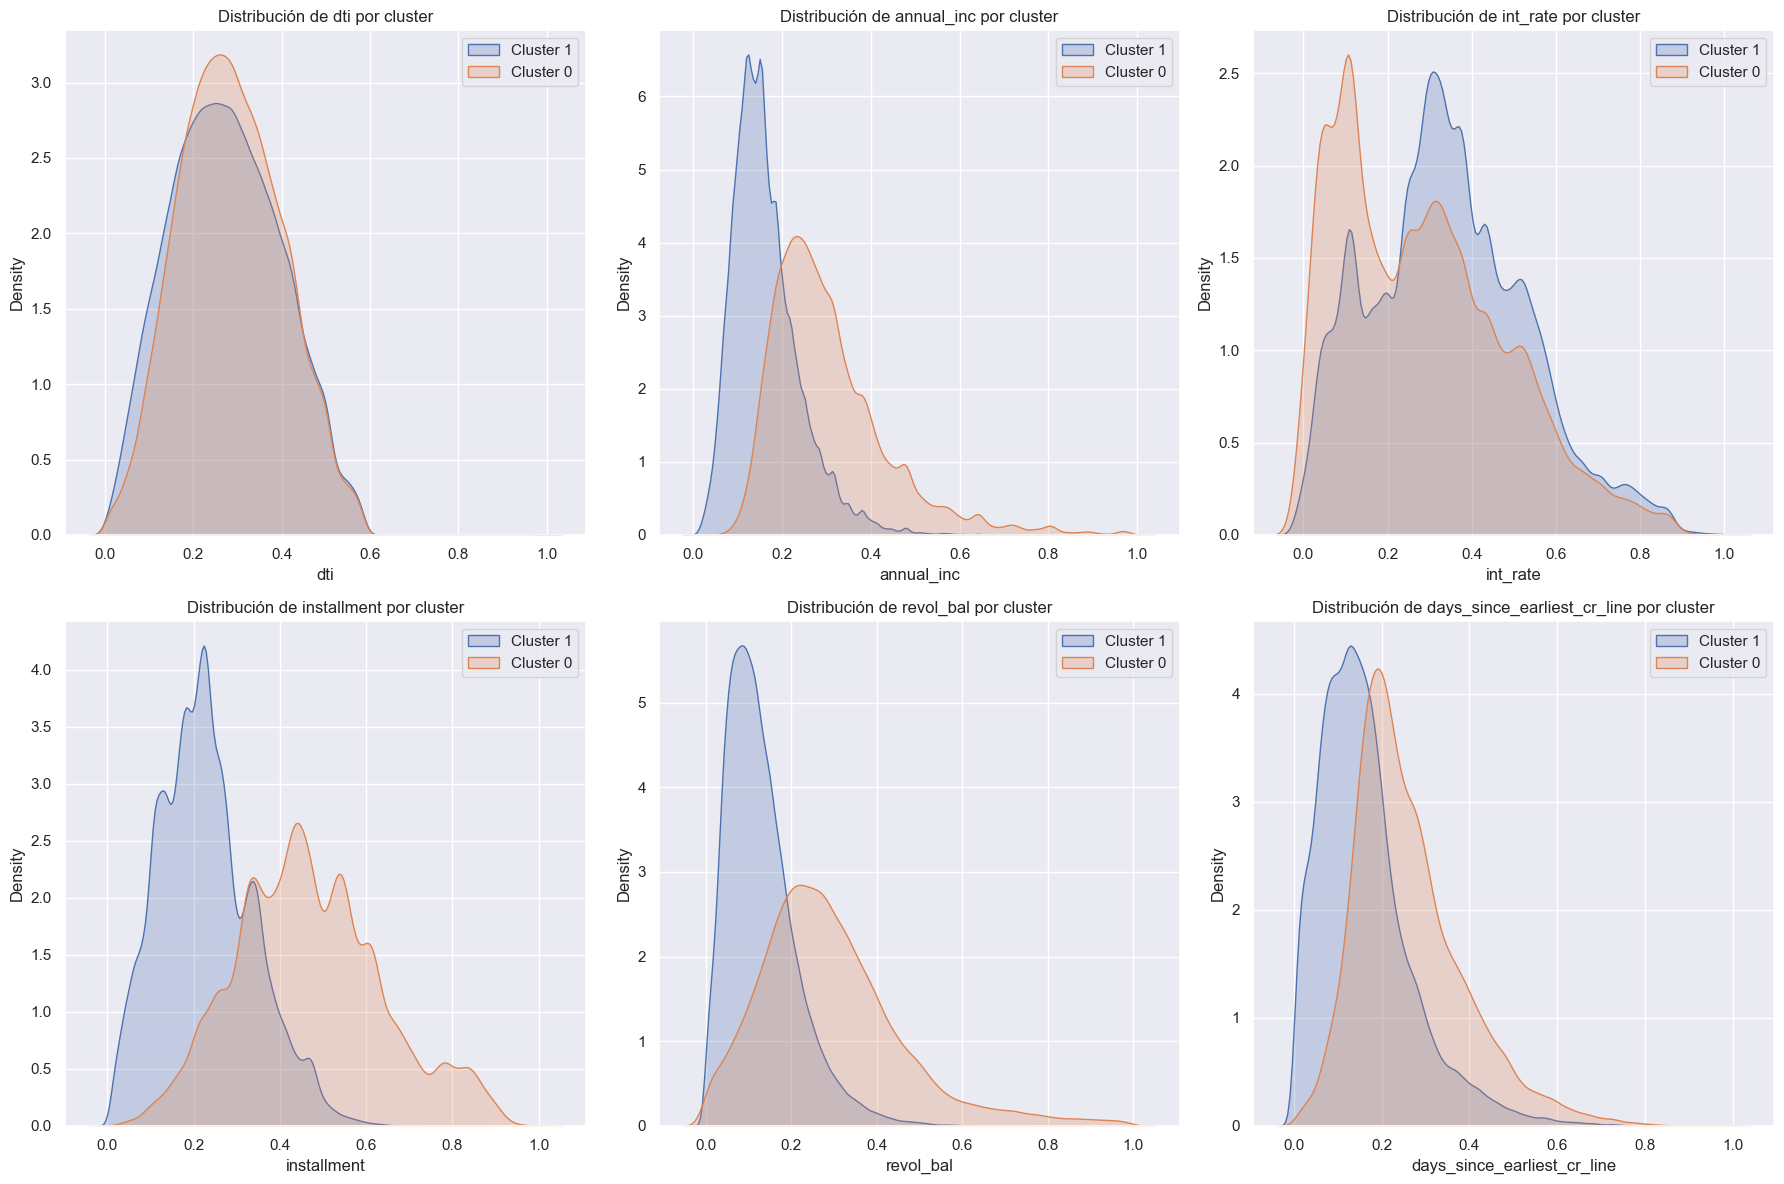

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de las variables que deseas graficar
selected_vars = ["dti", "annual_inc", "int_rate", "installment", "revol_bal", "days_since_earliest_cr_line"]

# Crea un conjunto de subgráficos con 2 filas y 3 columnas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# Aplanamos el objeto 'axes' para facilitar su manejo
axes = axes.ravel()

# Loop para graficar cada variable
for i, col_name in enumerate(selected_vars):
    for cluster in df['cluster'].unique():
        subset = df[df['cluster'] == cluster]
        sns.kdeplot(data=subset, x=col_name, label=f"Cluster {cluster}", shade=True, ax=axes[i])
    
    axes[i].set_title(f'Distribución de {col_name} por cluster')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()


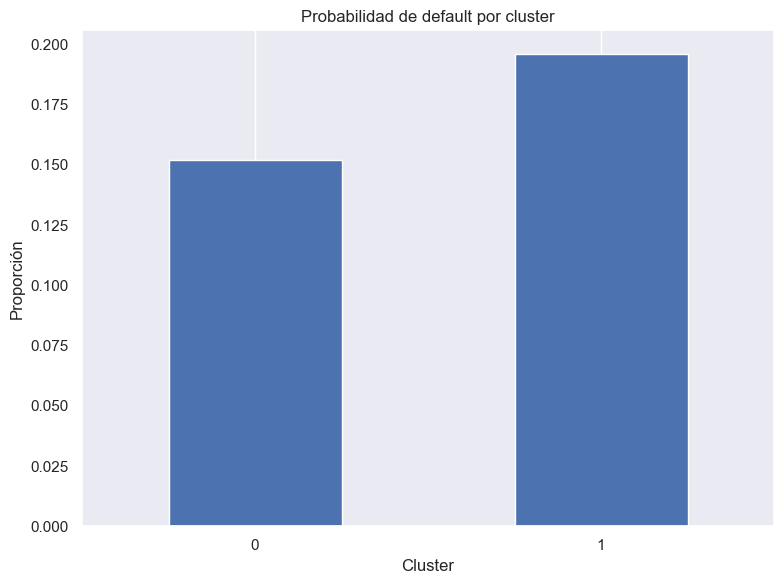

In [ ]:
#graficamos la proporcion de defualt en cada cluster

import pandas as pd
import matplotlib.pyplot as plt

# Combinar labels y y_train en un DataFrame
df_clusters = pd.DataFrame({"Cluster": labels, "Target": y_train})

# Calcular la proporción de 1s para cada cluster
proporcion_1s = df_clusters.groupby("Cluster").mean()

# Gráfico de barras
plt.figure(figsize=(8, 6))
proporcion_1s.plot(kind='bar', legend=False, ax=plt.gca())
plt.ylabel('Proporción')
plt.title('Probabilidad de default por cluster')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
